# Proyek Analisis Data: Air Quality Dataset

- Nama: Riandika Fathur Rochim
- Email: riandikafathurrochim@gmail.com
- ID Dicoding: https://www.dicoding.com/users/pandorarian/

# Pertanyaan Bisnis

 - Bagaimana pengaruh curah hujan terhadap konsentrasi PM2.5/PM10 di Guanyuan
- Apakah konsentrasi PM2.5 dan PM10 lebih tinggi pada musim dingin di Guanyuan

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Data Wrangling

## Gathering Data

In [2]:
df = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


## Assessing Data

In [3]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Melihat apakah dataset memiliki data kosong dan duplikat

In [5]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
df.duplicated().sum()

0

Melakukan pengecekan seberapa besar persentase missing values terhadap total data. Apabila kurang dari 5% dari total data, maka missing values pada data tidak terlalu banyak

In [7]:
(df.isna().sum() / len(df) ) * 100

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.756788
PM10       1.223477
SO2        1.351814
NO2        1.879420
CO         4.999430
O3         3.345311
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Sebagian besar kolom memiliki missing values kurang dari toleransi 5% dari total data. Bisa dikatakan dataset bisa diimputasi, dengan dampak dari tindakan tersebut tidak terlalu signifikan terhadap analisis nanti. Ini lebih baik daripada melakukan drop missing values 

kemudian kami ingin melihat nilai data kategorikal pada kolom 'wd'

In [8]:
df.wd.unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

## Cleaning Data

Untuk mengatasi data kosong pada kolom 'wd', akan digunakan modus

In [9]:
df['wd'].mode()[0]

'NE'

In [10]:
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

Sekarang kami ingin mengatasi data kosong pada kolom yang bersifat data numerik \
Sebelum melakukan imputasi, kami akan mengecek banyaknya data outlier dengan IQR pada masing-masing kolom fitur. Hal ini penting karena akan memberikan informasi untuk metode imputasi apa yang digunakan nanti.

In [11]:
data_numerik = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in data_numerik:
    # Skewness dan Kurtosis
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

    # Outlier dengan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier {col}: {len(outliers)}")
    print("-" * 40)

PM2.5: Skewness = 1.97, Kurtosis = 5.60
Jumlah outlier PM2.5: 1504
----------------------------------------
PM10: Skewness = 1.85, Kurtosis = 6.02
Jumlah outlier PM10: 1186
----------------------------------------
SO2: Skewness = 2.87, Kurtosis = 11.80
Jumlah outlier SO2: 3020
----------------------------------------
NO2: Skewness = 1.03, Kurtosis = 1.12
Jumlah outlier NO2: 664
----------------------------------------
CO: Skewness = 2.54, Kurtosis = 9.19
Jumlah outlier CO: 2167
----------------------------------------
O3: Skewness = 1.40, Kurtosis = 1.83
Jumlah outlier O3: 1343
----------------------------------------
TEMP: Skewness = -0.09, Kurtosis = -1.16
Jumlah outlier TEMP: 0
----------------------------------------
PRES: Skewness = 0.11, Kurtosis = -0.89
Jumlah outlier PRES: 0
----------------------------------------
DEWP: Skewness = -0.21, Kurtosis = -1.10
Jumlah outlier DEWP: 0
----------------------------------------
RAIN: Skewness = 34.72, Kurtosis = 1822.18
Jumlah outlier RA

untuk kolom fitur TEMP, PRES, dan DEWP tidak memiliki outlier. Sehingga kami menggunakan metode imputasi dengan mean untuk kolom tersebut. Sisa selain itu, kami akan menggunakan metode imputasi dengan median karena terdapat outlier yang signifikan berbeda pada kolom fiturnya

In [12]:
with_outlier = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']
non_outlier = ['TEMP', 'PRES', 'DEWP']
df[with_outlier] = df[with_outlier].fillna(df[with_outlier].median())
df[non_outlier] = df[non_outlier].fillna(df[non_outlier].mean())

# Exploration Data Analysis (EDA)

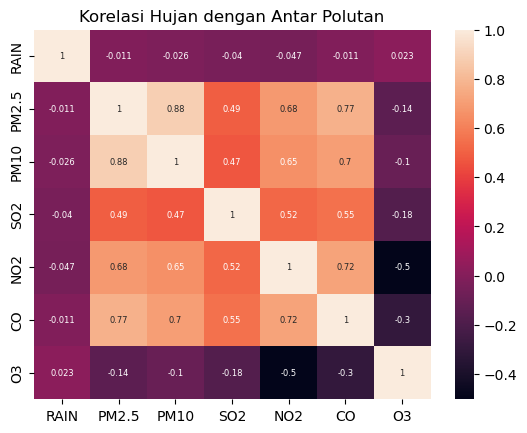

In [13]:
korelasi = df[['RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
plt.title('Korelasi Hujan dengan Antar Polutan')
sns.heatmap(korelasi, annot=True, annot_kws={"size": 6})
plt.show()

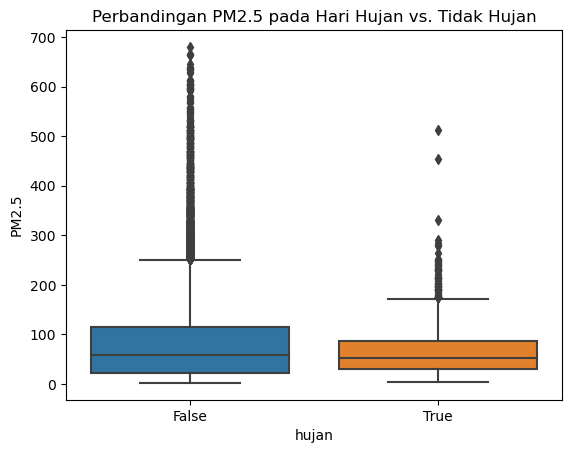

In [14]:
df['hujan'] = df['RAIN'] > 0
sns.boxplot(data=df, x='hujan', y='PM2.5')
plt.title('Perbandingan PM2.5 pada Hari Hujan vs. Tidak Hujan')
plt.show()

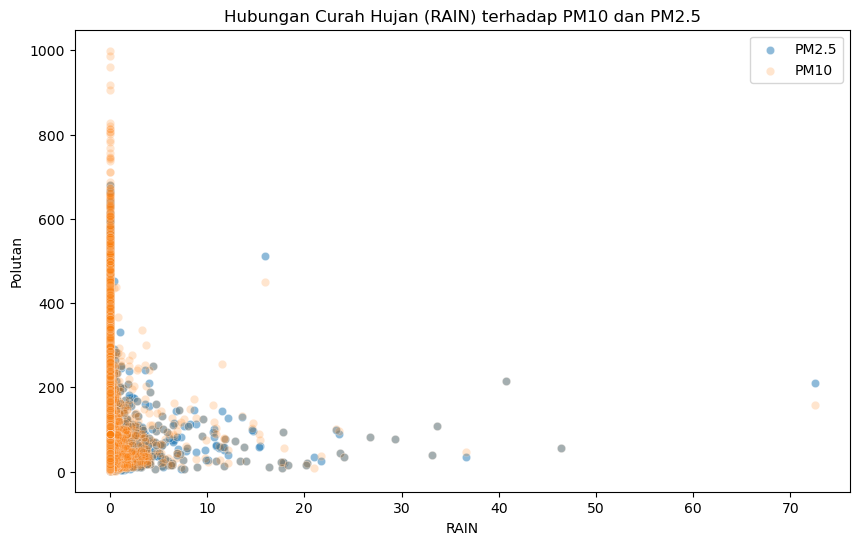

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAIN', y='PM2.5', alpha=0.5, label="PM2.5")
sns.scatterplot(data=df, x='RAIN', y='PM10', alpha=0.2, label="PM10")
plt.legend()
plt.ylabel("Polutan")
plt.title('Hubungan Curah Hujan (RAIN) terhadap PM10 dan PM2.5')
plt.show()

In [16]:
#Di Guanyuan, terjadi musim dingin pada bulan Desember, Januari dan Februari
df['musim'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Other')

In [17]:
musim_avg = df.groupby('musim')[['PM2.5', 'PM10']].mean().reset_index()
musim_avg

,musim,PM2.5,PM10
0,Other,77.795212,106.185652
1,Winter,96.888181,116.678428


# Visualization & Explanatory Analysis

1. Bagaimana pengaruh curah hujan terhadap konsentrasi polutan PM2.5 dan PM10 di Guanyuan

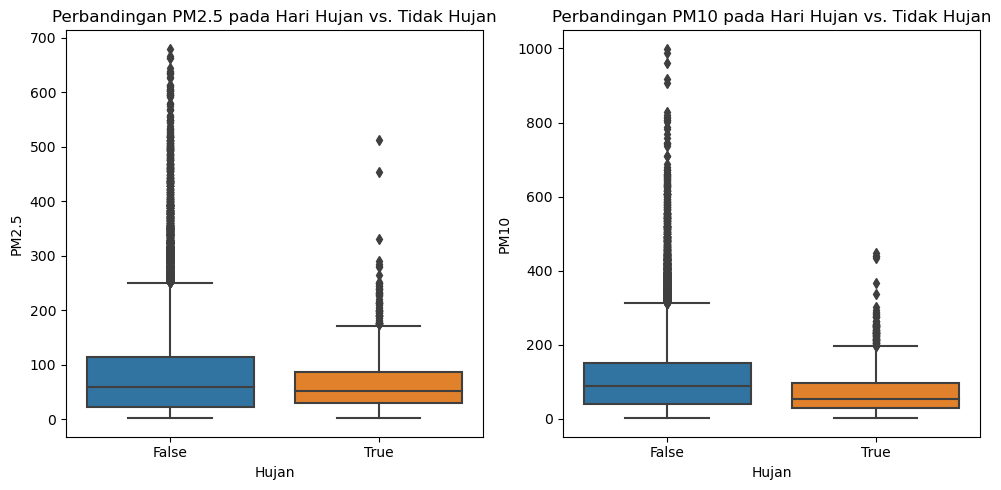

In [18]:
df['hujan'] = df['RAIN'] > 0
# Buat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot untuk PM2.5
sns.boxplot(data=df, x='hujan', y='PM2.5', ax=axes[0])
axes[0].set_title('Perbandingan PM2.5 pada Hari Hujan vs. Tidak Hujan')
axes[0].set_xlabel('Hujan')
axes[0].set_ylabel('PM2.5')

# Boxplot untuk PM10
sns.boxplot(data=df, x='hujan', y='PM10', ax=axes[1])
axes[1].set_title('Perbandingan PM10 pada Hari Hujan vs. Tidak Hujan')
axes[1].set_xlabel('Hujan')
axes[1].set_ylabel('PM10')

# Tampilkan plot
plt.tight_layout()
plt.show()

pada saat terjadi hujan, kejadian konsentrasi PM2.5/PM10 yang ekstrem lebih sedikit daripada saat tidak terjadi hujan

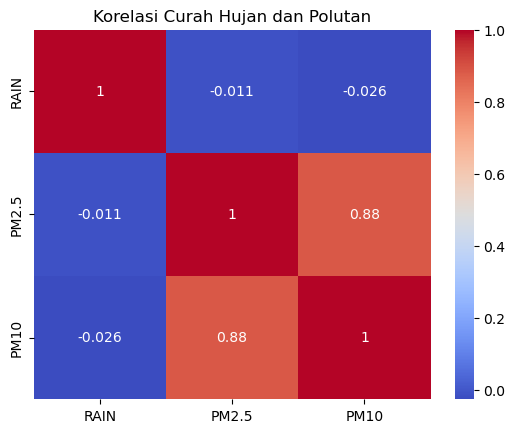

In [19]:
corr_matrix = df[['RAIN', 'PM2.5', 'PM10']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Curah Hujan dan Polutan')
plt.show()

Berdasarkan map korelasi, semakin tinggi curah hujan maka semakin rendah konsentrasi PM2.5/PM10 (rata-rata kasus). Pernyataan ini juga didukung dengan temuan kepadatan hubungan curah hujan dengan PM2.5/PM10 sebagai berikut

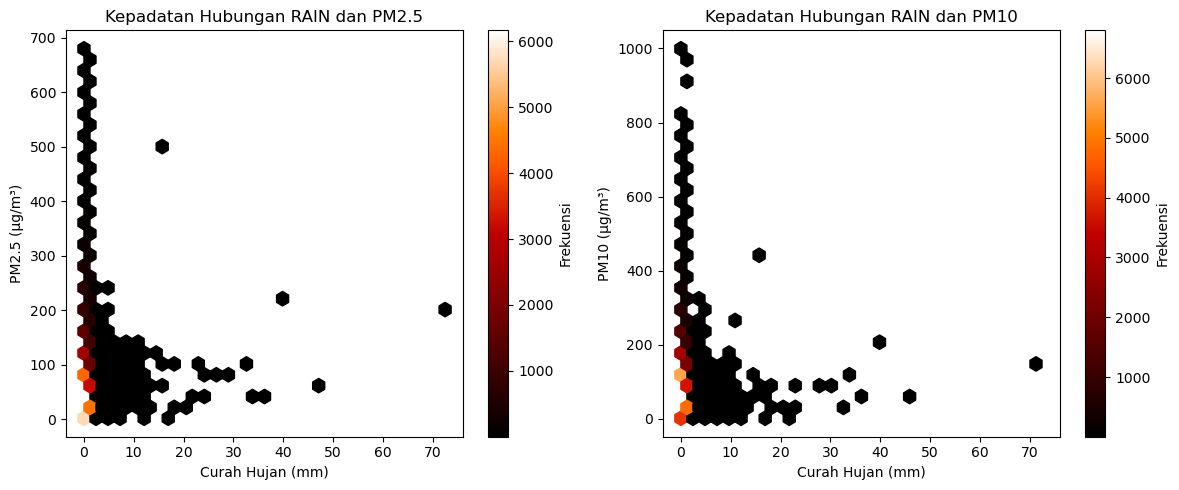

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot hexbin untuk hubungan RAIN dan PM2.5
hb0 = axes[0].hexbin(df['RAIN'], df['PM2.5'], gridsize=30, cmap='gist_heat', mincnt=1)
cb0 = fig.colorbar(hb0, ax=axes[0], label='Frekuensi')
axes[0].set_title('Kepadatan Hubungan RAIN dan PM2.5')
axes[0].set_xlabel('Curah Hujan (mm)')
axes[0].set_ylabel('PM2.5 (µg/m³)')

# Plot hexbin untuk hubungan RAIN dan PM10
hb1 = axes[1].hexbin(df['RAIN'], df['PM10'], gridsize=30, cmap='gist_heat', mincnt=1)
cb1 = fig.colorbar(hb1, ax=axes[1], label='Frekuensi')
axes[1].set_title('Kepadatan Hubungan RAIN dan PM10')
axes[1].set_xlabel('Curah Hujan (mm)')
axes[1].set_ylabel('PM10 (µg/m³)')

plt.tight_layout()
plt.show()

2. Apakah konsentrasi PM2.5 dan PM10 lebih tinggi pada musim dingin di Guanyuan

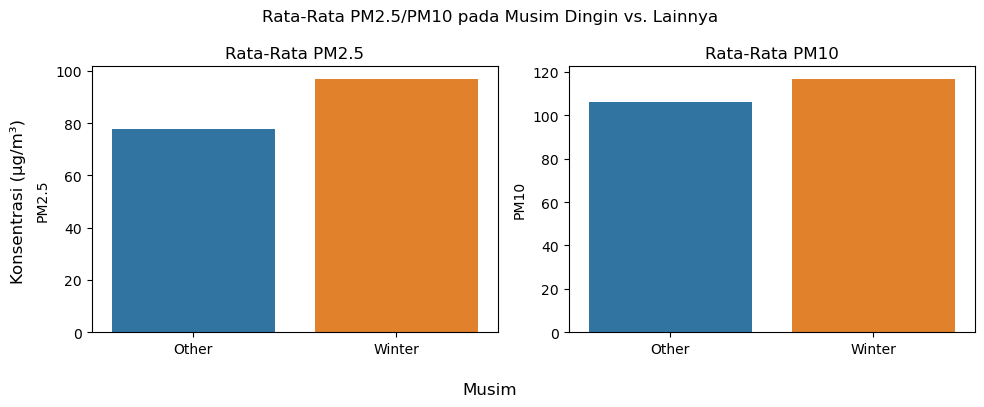

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot untuk PM2.5
sns.barplot(data=musim_avg, x='musim', y='PM2.5', ax=axes[0])
axes[0].set_title('Rata-Rata PM2.5')
axes[0].set_xlabel('')

# Boxplot untuk PM10
sns.barplot(data=musim_avg, x='musim', y='PM10', ax=axes[1])
axes[1].set_title('Rata-Rata PM10')
axes[1].set_xlabel('')

plt.suptitle('Rata-Rata PM2.5/PM10 pada Musim Dingin vs. Lainnya')
fig.supylabel('Konsentrasi (µg/m³)')
fig.supxlabel('Musim')

# Tampilkan plot
plt.tight_layout()
plt.show()

Terlihat secara rata-rata, konsentrasi PM2.5/PM10 lebih tinggi pada musim dingin dibandingkan pada musim lainnya

# Analisis Lanjutan

Untuk analisis lebih lanjut mengenai apakah konsentrasi PM2.5 dan PM10 lebih tinggi pada musim dingin di Guanyuan, akan digunakan uji hipotesis dangan t-test sebagai berikut

## Uji Hipotesis dengan t-Test

Didefinisikan: \
(Hipotesis awal) $H_0 : μ₁ = μ₂$ \
(Hipotesis alternatif) $H_1 : μ₁ > μ₂$ 
\
\
Keterangan:\
Hipotesis awal $H_0$ menyatakan tidak ada perbedaan signifikan antara konsentrasi PM2.5/PM10 pada musim dingin dan musim lainnya. \
Dan hipotesis alternatif $H_1$ menyatakan Konsentrasi PM2.5/PM10 lebih tinggi pada musim dingin dibandingkan musim lainnya.

Hasil kondisi yang akan dituju:
melihat p-value apakah < 0.05, bertujuan untuk menentukan apakah hasil menolak $H_0$ maupun sebaliknya

In [22]:
from scipy.stats import ttest_ind

winter_pm25 = df[df['musim'] == 'Winter']['PM2.5']
other_pm25 = df[df['musim'] != 'Winter']['PM2.5']

winter_pm10 = df[df['musim'] == 'Winter']['PM10']
other_pm10 = df[df['musim'] != 'Winter']['PM10']

t_stat25, p_value25 = ttest_ind(winter_pm25, other_pm25)
t_stat10, p_value10 = ttest_ind(winter_pm10, other_pm10)

print(f"P-value PM2.5: {p_value25:.104f}")  # Jika p-value < 0.05, beda signifikan
print(f"P-value PM10: {p_value10:.104f}")  # Jika p-value < 0.05, beda signifikan

P-value PM2.5: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000011909385696800167381019
P-value PM10: 0.00000000000000000001226257393485155199118306410538596134071503451964520341513874279737450478933169506490


Terlihat masing-masing P-value < 0.05, yang artinya tolak $H_0$. Sehingga hipotesis awal tidak diterima.
Dapat disimpulkan bahwa konsentrasi PM2.5 dan PM10 lebih tinggi pada musim dingin di Guanyuan.

kemudian akan di cek korelasi PM2.5/PM10 dengan TEMP

In [23]:
corr_pm25_temp, corr_pm10_temp = df[['PM2.5', 'TEMP']].corr().iloc[0, 1], df[['PM10', 'TEMP']].corr().iloc[0, 1]
print(f"Korelasi PM2.5 vs Suhu: {corr_pm25_temp:.2f}")
print(f"Korelasi PM10 vs Suhu: {corr_pm10_temp:.2f}")

Korelasi PM2.5 vs Suhu: -0.13
Korelasi PM10 vs Suhu: -0.09


Terlihat masing-masing korelasi bernilai negatif. Yang artinya semakin tinggi suhu (TEMP), maka semakin rendah PM2.5/PM10. Hal ini menjadi temuan mendukung hipotesis alternatif yang menjadi kesimpulan sebelumnya

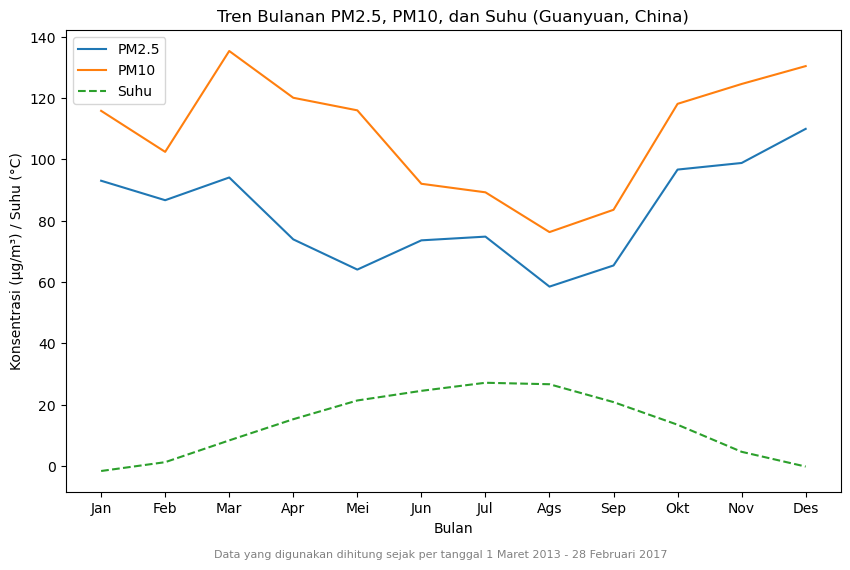

In [24]:
# Agregasi data bulanan
monthly_avg = df.groupby('month')[['PM2.5', 'PM10', 'TEMP']].mean().reset_index()

# Plot tren bulanan
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='month', y='PM2.5', label='PM2.5')
sns.lineplot(data=monthly_avg, x='month', y='PM10', label='PM10')
sns.lineplot(data=monthly_avg, x='month', y='TEMP', label='Suhu', linestyle='--')

# Label sumbu Y
plt.ylabel('Konsentrasi (µg/m³) / Suhu (°C)')  # <--- Label yang jelas
plt.xlabel('Bulan')
plt.title('Tren Bulanan PM2.5, PM10, dan Suhu (Guanyuan, China)')
# plt.subtitle('Guanyuan')
plt.figtext(
    0.5, 0,  # Posisi (x, y) relatif terhadap figure (0-1)
    "Data yang digunakan dihitung sejak per tanggal 1 Maret 2013 - 28 Februari 2017",
    fontsize=8,  # Ukuran kecil
    color="gray",
    ha="center"  # Posisi horizontal: center
)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend()
plt.show()

Dengan tren bulanan ini kita bisa melihat bahwa: pada musim dingin di Guanyuan yang terjadi pada bulan Desember, Januari, dan Februari, maka terjadi penurunan suhu dan terlihat tren konsentrasi PM2.5/PM10 lebih tinggi dibandingkan tren konsentrasi PM2.5/PM10 saat suhu di musim lain

# Conclusion

Conclusion 1 : Pada saat hujan, konsentrasi PM2.5/PM10 yang ekstrem lebih rendah dibandingkan saat tidak hujan. berdasarkan hasil korelasi, semakin tinggi curah hujan, maka semakin lemah konsentrasi PM2.5/PM10 untuk meningkat.

Conclusion 2: Di Guanyuan, konsentrasi PM2.5/PM10 akan lebih meningkat pada musim dingin dibandingkan pada musim lainnya

In [26]:
df.to_csv('main_data.csv', index=False)